In [125]:
import numpy as np

MID = 2
gamma = 0.1  # Lower learning rate
c = 0

# Xavier initialization
w1 = np.random.randn(1, MID) * np.sqrt(2 / 1)
w2 = np.random.randn(MID, MID) * np.sqrt(2 / MID)
w3 = np.random.randn(MID, MID) * np.sqrt(2 / MID)
w4 = np.random.randn(MID, MID) * np.sqrt(2 / MID)
w5 = np.random.randn(MID, 1) * np.sqrt(2 / MID)

b1, b2, b3, b4, b5 = np.zeros((1, MID)), np.zeros((1, MID)), np.zeros((1, MID)), np.zeros((1, MID)), np.zeros((1, 1))

relu = lambda x: np.maximum(0, x)
relu_p = lambda x: np.where(x > 0, 1.0, 0.0)

target = lambda x: 2**x

def clip_gradient(grad, limit=1.0):
    return np.clip(grad, -limit, limit)
a0 = np.linspace(0, 13, 30).reshape(-1, 1)
y = target(a0)
while True:
    c += 1
   
    # Forward pass
    z1 = a0 @ w1 + b1
    a1 = relu(z1)
    z2 = a1 @ w2 + b2
    a2 = relu(z2)
    z3 = a2 @ w3 + b3
    a3 = relu(z3)
    z4 = a3 @ w4 + b4
    a4 = relu(z4)
    z5 = a4 @ w5 + b5
    a5 = z5  # No ReLU on output

    loss = np.mean((a5 - y) ** 2)

    # Backpropagation
    da5 = 2 * (a5 - y)
    dz5 = da5
    dw5 = a4.T @ dz5
    db5 = np.sum(dz5, axis=0, keepdims=True)
    w5 -= gamma * clip_gradient(dw5)
    b5 -= gamma * clip_gradient(db5)

    da4 = dz5 @ w5.T
    dz4 = da4 * relu_p(z4)
    dw4 = a3.T @ dz4
    db4 = np.sum(dz4, axis=0, keepdims=True)
    w4 -= gamma * clip_gradient(dw4)
    b4 -= gamma * clip_gradient(db4)

    da3 = dz4 @ w4.T
    dz3 = da3 * relu_p(z3)
    dw3 = a2.T @ dz3
    db3 = np.sum(dz3, axis=0, keepdims=True)
    w3 -= gamma * clip_gradient(dw3)
    b3 -= gamma * clip_gradient(db3)

    da2 = dz3 @ w3.T
    dz2 = da2 * relu_p(z2)
    dw2 = a1.T @ dz2
    db2 = np.sum(dz2, axis=0, keepdims=True)
    w2 -= gamma * clip_gradient(dw2)
    b2 -= gamma * clip_gradient(db2)

    da1 = dz2 @ w2.T
    dz1 = da1 * relu_p(z1)
    dw1 = a0.T @ dz1
    db1 = np.sum(dz1, axis=0, keepdims=True)
    w1 -= gamma * clip_gradient(dw1)
    b1 -= gamma * clip_gradient(db1)

    # Check for NaN
    if np.isnan(loss):
        print("Loss became NaN. Stopping training.")
        break

    if c % 1000 == 0:
        print(f"Iteration {c}: Loss = {loss:.6f}")


Iteration 1000: Loss = 1803624.380753
Iteration 2000: Loss = 1803624.380753
Iteration 3000: Loss = 1803624.380753
Iteration 4000: Loss = 1803624.380753
Iteration 5000: Loss = 1803624.380753
Iteration 6000: Loss = 1803624.380753
Iteration 7000: Loss = 1803624.380753
Iteration 8000: Loss = 1803624.380753
Iteration 9000: Loss = 1803624.380753
Iteration 10000: Loss = 1803624.380753
Iteration 11000: Loss = 1803624.380753
Iteration 12000: Loss = 1803624.380753
Iteration 13000: Loss = 1803624.380753
Iteration 14000: Loss = 1803624.380753
Iteration 15000: Loss = 1803624.380753
Iteration 16000: Loss = 1803624.380753
Iteration 17000: Loss = 1803624.380753
Iteration 18000: Loss = 1803624.380753
Iteration 19000: Loss = 1803624.380753
Iteration 20000: Loss = 1803624.380753
Iteration 21000: Loss = 1803624.380753
Iteration 22000: Loss = 1803624.380753
Iteration 23000: Loss = 1803624.380753
Iteration 24000: Loss = 1803624.380753
Iteration 25000: Loss = 1803624.380753
Iteration 26000: Loss = 1803624.38

KeyboardInterrupt: 

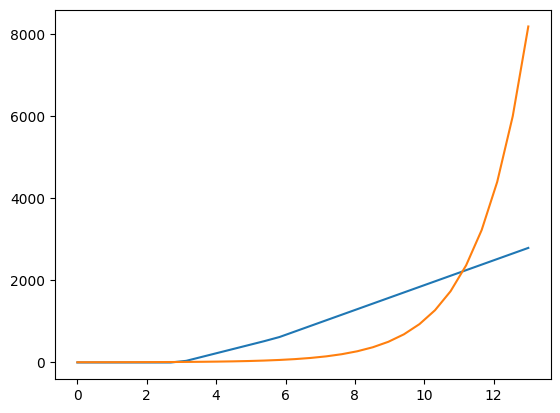

In [126]:

z1 = np.linspace(0, 13, 30).reshape(-1, 1) @ w1 + b1
a1 = relu(z1)
z2 = a1 @ w2 + b2
a2 = relu(z2)
z3 = a2 @ w3 + b3
a3 = relu(z3)
z4 = a3 @ w4 + b4
a4 = relu(z4)
z5 = a4 @ w5 + b5
import matplotlib.pyplot as plt
plt.plot(np.linspace(0, 13, 30), z5)
plt.plot(np.linspace(0, 13, 30), 2**np.linspace(0, 13, 30))
plt.show()